In [1]:
%matplotlib inline
%load_ext fortranmagic

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

/home/ssanderson/.virtualenvs/fonc/lib/python3.5/site-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>Foundations of Numerical Computing</h1>
  <h3>Scott Sanderson (GitHub: [@ssanderson](https://github.com/ssanderson), Twitter: [@scottbsanderson](https://twitter.com/scottbsanderson) )</h3>
  <h3>Materials: [https://github.com/ssanderson/foundations-of-numerical-computing](https://github.com/ssanderson/foundations-of-numerical-computing)</h3>
</center>

# About Me:

- Senior Engineer at [Quantopian](www.quantopian.com)
- I build tools for strangers on the internet to write quantitative trading strategies in Python.
- Most of those tools are built on top of numpy.

## Introduction

The goal of this tutorial is help you effectively solve numerically-intensive problems in Python.

In practice, doing numerical programming in Python means using [`numpy`](http://www.numpy.org/) (or a library built on top of `numpy`).

Using `numpy` effectively requires changing the way that you think about and solve problems.

# Warm Up: Finding Functions and Documentation in Jupyter

# Review: Python Lists

In [2]:
assert ran_the_first_cell, "You need to run the first cell!"

In [3]:
l = [1, 'two', 3.0, 4, 5j, "six"]
l

[1, 'two', 3.0, 4, 5j, 'six']

In [4]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [5]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5j


In [6]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
l = [1, 'two', 3.0, 4, 5j, "six"]
sublist = l[1:3]
sublist

['two', 3.0]

In [7]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
print("First Three:", first_three)

# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
print("After Three:", after_three)

First Three: [1, 'two', 3.0]
After Three: [4, 5j, 'six']


In [8]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [9]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]

print("Before:", l)

l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [10]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review of Review: Python Lists

- Zero-indexed sequence of values.
- Can hold values of different types in a single list.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>

## Numerical Programming in Pure Python

In [11]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [12]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

matmul(a, b)

[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [13]:
%%time
matmul(a, b)

CPU times: user 23 µs, sys: 15 µs, total: 38 µs
Wall time: 42.9 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [14]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.2556594131922857, 0.5808554744836325, 0.01601689680241003],
 [0.5603496796153556, 0.6305687799297003, 0.8699113554817012]]

In [15]:
%%time
randa = random_matrix(500, 100)
randb = random_matrix(100, 500)
x = matmul(randa, randb)

CPU times: user 4.14 s, sys: 10.1 ms, total: 4.15 s
Wall time: 4.15 s


In [16]:
# Maybe that's as good as we can do?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [17]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [18]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [19]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 8.47 ms, sys: 65 µs, total: 8.53 ms
Wall time: 8.5 ms


333328333350000.0

In [20]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 124 µs, sys: 16 µs, total: 140 µs
Wall time: 144 µs


333328333350000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>

## Why is the Python Version so Much Slower?

In [21]:
# Dynamic typing.
def multiply_elementwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

multiply_elementwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [22]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              3 LOAD_NAME                1 (b)
              6 LOAD_NAME                2 (c)
              9 BINARY_MULTIPLY
             10 BINARY_ADD
             11 RETURN_VALUE


## Review: Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Normal Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, can we find a way to not pay (much) for it?

- **Idea:** Dispatch **once per operation** instead of **once per element**.

# Numpy

In [23]:
import numpy as np

data = np.array([1, 2, 3, 4, 5, 6, 7, 8])

print("Data:", data)
print("===========")
print("DType:", data.dtype)
print("Shape:", data.shape)

Data: [1 2 3 4 5 6 7 8]
DType: int64
Shape: (8,)


In [24]:
# Numpy provides operators that "vectorize" over the entire array.
data + data

array([ 2,  4,  6,  8, 10, 12, 14, 16])

In [25]:
%%time
# Naive dot product
(data * data).sum()

CPU times: user 43 µs, sys: 6 µs, total: 49 µs
Wall time: 51.5 µs


204

In [26]:
%%time
# Built-in dot product.
data.dot(data)

CPU times: user 22 µs, sys: 3 µs, total: 25 µs
Wall time: 28.1 µs


204

In [27]:
%%time
fortran_dot_product(data, data)

CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 18.6 µs


204.0

In [28]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array as long as the number of elements doesn't change.
reshaped = data.reshape(4, 2)
reshaped

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# Exercises - Measuring Performance

## Numpy Toolbox - Overview

Numpy can be fast because it allows us to specify operations to perform against an entire array.

We can break down the tools provided by numpy into a few categories:

1. Array Creation and Reshaping
2. Universal Functions (UFuncs)
3. Selection
4. Reductions
5. Broadcasting

Taken together, these operations form an expressive toolbox that can solve a diverse set of problems.

## Creating Arrays

- `np.array`: Construct an array from a list of Python objects.
- `np.arange`: Numpy equivalent of the `range` function.
- `np.linspace`: Create an array from evenly-spaced points between two values.
- `np.random`: Randomly-generated values from various distributions.
- `np.full`/`np.ones`/`np.zeros`: Create an array of a given shape with a constant value.

## Creating Arrays (cont'd)

- `np.eye`/`np.identity`/`np.diag`: Arrays with values on the diagonal. Useful for linear algebra.
- `np.load`/`np.save`: Load and save values from disk.
- `pandas.read_csv`: Read values from a CSV. Returns a [`pandas.DataFrame`](https://pandas.pydata.org/).

## Reshaping Arrays

Once we've created an array, the next step is often to **reshape** the array to have the dimensions we want.

In [29]:
data = np.arange(16)
data.reshape(4, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

## Transpose

A particularly common way to reshape arrays is to swap a pair of dimensions.

In [30]:
data = np.arange(12).reshape(3, 4)
print("data:\n", data)
print("data.T:\n", data.T)

data:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
data.T:
 [[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


## Exercise  - Creating and Reshaping Arrays

## Numpy Toolbox - Universal Functions

Universal functions (ufuncs) are functions that can be applied across one or more arrays of the same shape.

They come in two main varieties:

- **Unary UFuncs** apply a 1-argument function to every element of an array.
- **Binary UFuncs** apply a 2-argument function to corresponding elements from two arrays.

In [31]:
data = np.arange(1, 16).reshape(3, 5)
data

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [32]:
# Unary functions.
np.sqrt(data)
#np.log(data)
#np.sin(data)

array([[1.        , 1.41421356, 1.73205081, 2.        , 2.23606798],
       [2.44948974, 2.64575131, 2.82842712, 3.        , 3.16227766],
       [3.31662479, 3.46410162, 3.60555128, 3.74165739, 3.87298335]])

In [33]:
# Binary operators.
data + data

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20],
       [22, 24, 26, 28, 30]])

In [34]:
# Comparison operations
(data % 3) == 0

array([[False, False,  True, False, False],
       [ True, False, False,  True, False],
       [False,  True, False, False,  True]])

In [35]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[False, False, False, False, False],
       [ True, False, False, False, False],
       [False,  True, False, False, False]])

In [36]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 55, 130, 205],
       [130, 330, 530],
       [205, 530, 855]])

## UFunc Functions

All binary operator ufuncs have a normal function version:

- `+`,`-`,`*`,`/` are the same as `add`, `subtract`, `multiply`, `divide`
- `&`, `|`, `^`, `~` are the same as `bitwise_and`, `bitwise_or`, `bitwise_xor`, `bitwise_not`

Binary ufuncs are equipped with methods that implement common algorithms in terms of the ufunc.

- `reduce` computes a summary by inserting the binary operator between each element.
- `accumulate` is like `reduce`, but it outputs the intermediate values.
- `outer` computes the binary operator on every pair of elements from two arrays.

In [37]:
data = (np.random.RandomState(1).randint(-10, 10, 18).reshape(3, 6))
data

array([[ -5,   1,   2,  -2,  -1,   1],
       [ -5,   5, -10,   6,  -9,   2],
       [ -3,   3,  -4,   8,  -5,   8]])

In [38]:
np.add.accumulate(data, axis=0)

array([[ -5,   1,   2,  -2,  -1,   1],
       [-10,   6,  -8,   4, -10,   3],
       [-13,   9, -12,  12, -15,  11]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# UFuncs Review (cont'd)

- UFunc Methods
  - `reduce`
  - `accumulate`
  - `outer`
  - `at` and `reduceat` (less common)

# UFunc Exercises

# Solving Problems with Numpy: Selections

When working with numpy, we often find that we need to operate on only a subset of our data.

Numpy arrays support the same set of rich slicing operations as Python lists, and they extend those semantics to support:

1. Selection of multiple indices.
2. Selection by boolean predicates.
3. Multiple dimensions.

In [39]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [40]:
# Indexing works with the same semantics as Python lists.
sines[0]

0.0

In [41]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [42]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [43]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [44]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("\nsines > 0.5:\n", sines > 0.5)
print("\nsines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]

sines > 0.5:
 [False False  True  True  True  True  True  True False False]

sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [45]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [46]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [47]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [48]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [49]:
prices = np.array([12, 6, 10, 5, 6])
tickers = np.array(['A', 'B', 'C', 'D', 'E'])

In [50]:
# Sort assets by price by using the permutation that would sort market caps on ``assets``.
sorter = np.argsort(prices)
tickers[sorter]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

On multi-dimensional arrays, we can slice along each axis independently.

In [51]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [52]:
data[1]             # Get the second row.
#data[:2, :2]       # Get the first two rows and first two columns.
#data[:2, [0, -1]]  # Get the first two rows, first/last columns.

array([5, 6, 7, 8, 9])

In [53]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

Another common way to "select" data is to use `np.where` as a vectorized if-statement.

`np.where` takes three arguments: a boolean mask, an array of values to use for True locations, and an array of values to use for False locations.

In [54]:
data = np.linspace(-5, 5, 9).reshape(3, 3)
data

array([[-5.  , -3.75, -2.5 ],
       [-1.25,  0.  ,  1.25],
       [ 2.5 ,  3.75,  5.  ]])

In [55]:
# We can implement a simple abs() function by selecting the data when the data > 0, and -data otherwise.
np.where(data > 0, data, -data)

array([[ 5.  ,  3.75,  2.5 ],
       [ 1.25, -0.  ,  1.25],
       [ 2.5 ,  3.75,  5.  ]])

# Selections Review

- Basic slicing operations work on Numpy arrays the same way they do on lists.
- Multidimensional arrays can apply selections independently along different axes.
- Indexing with a scalar removes a dimension.
- Indexing with slices, boolean arrays, index lists keep dimension unchanged.
  - Slice selects across axis with same rules as Python list.
  - Boolean array filters to coordinates where indexer is True.
  - Index list selects each corresponding index.
- `np.where` is like a vectorized if-statement.

# Selections Exercises

## Reductions

Another common class of operations in numpy is to "summarize" our data along a particular axis.

Examples of common "summaries" are:

- Minimum/Maximum
- Location of Minimum/Maximum (`argmin`/`argmax`)
- Sum/Product
- Statistical Moments (mean, variance, skew, kurtosis)

When we have a multidimensional array, we 

$Var(X) = \frac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2$

In [56]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [57]:
xs = np.random.standard_normal(1000)
variance(xs)

0.912291315830511

In [58]:
np.var(xs)

0.912291315830511

- ...we can do more interesting things with multi-dimensional arrays.

In [59]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [60]:
data.mean()

14.5

In [61]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [62]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over an entire array, or along a given axis.
- There are many built-in reductions:
  - `np.mean`
  - `np.var`
  - `np.median`
  - `np.count_nonzero`
  - `np.min`
  - `np.max`
  - ... many more in packages like `scipy`.

# Reductions Exercises

# Broadcasting

When working with multi-dimensional data, we often encounter situations where we have two "compatible" arrays of different dimensions, and we want to perform an operation on both arrays. NumPy's [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) system defines a set of rules that make this possible in a natural and intuitive way.

## Array Scalar Broadcasting

We've already seen one example of broadcasting in action: combining arrays with scalars.

Whenever you call a function that expects two arrays of the same shape, you can replace one of the arrays with a scalar.

In [63]:
data = np.eye(3)
print(data)
#print(data * 2)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Broadcasting with "Smaller" Arrays

Another common pattern where broadcasting is useful occurs when you have an N-dimensional array, and a "smaller" array whose dimensions are a subset of the larger array. 

A common way to create such an array is to apply one of the reductions we saw earlier.

In [64]:
rng = np.random.RandomState(42)
data = rng.randint(-1, 5, (3, 6))
data

array([[2, 3, 1, 3, 3, 0],
       [1, 1, 1, 3, 2, 1],
       [4, 3, 0, 2, 4, 4]])

In [65]:
# Subtract the mean of each column the values in the column. 
# This is a common operation when fitting statistical models.
print("Data:\n", data, sep='')
print("\nMean:\n", data.mean(axis=0), sep='')
print("\nData - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[2 3 1 3 3 0]
 [1 1 1 3 2 1]
 [4 3 0 2 4 4]]

Mean:
[2.33333333 2.33333333 0.66666667 2.66666667 3.         1.66666667]

Data - Mean:
[[-0.33333333  0.66666667  0.33333333  0.33333333  0.         -1.66666667]
 [-1.33333333 -1.33333333  0.33333333  0.33333333 -1.         -0.66666667]
 [ 1.66666667  0.66666667 -0.66666667 -0.66666667  1.          2.33333333]]


In [66]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [67]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

# Broadcasting Rules

Given arrays `x` and `y`:

1. If either array has a smaller dimension, make the dimensions match by padding 1s to the shape of the smaller array.
2. Iterate pairwise over the shapes of both arrays. At each coordinate:
   - If the sizes of the arrays match, do nothing.
   - If exactly one of the arrays has a dimension of size 1, make the dimensions match by "tiling" the smaller array along the current dimension.
   - If the arrays have unequal dimensions and neither is equal to 1, raise an error.

## Broadcasting Visualized

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

## Adding Extra Dimensions for Broadcasting

Sometimes we have two one-dimensional arrays, and we want to combine them via broadcasting into a two-dimensional array.

When that happens, we can use `np.newaxis` to insert extra dimensions of size into an array.

In [68]:
x = np.linspace(-5, 5, 5)
x
#x[:, np.newaxis]
#x + x[:, np.newaxis]

array([-5. , -2.5,  0. ,  2.5,  5. ])

Using `newaxis` often provides an easier alternative to `np.meshgrid` when doing 2D plotting.

In [69]:
x = np.linspace(-5, 5, 100)
y = x[:, np.newaxis]
print("x shape:", x.shape, "y shape:", y.shape, "x + y shape", (x + y).shape)

x shape: (100,) y shape: (100, 1) x + y shape (100, 100)


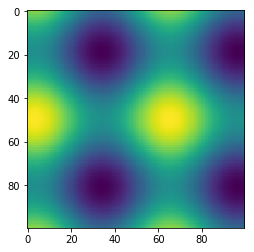

In [70]:
plt.imshow(np.sin(x) + np.cos(y));

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Broadcasting Exercises

# Peeking Under the Hood: Strided Memory

In [71]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

data = np.arange(12).reshape(3, 4)
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [72]:
first_row = data[0]
#first_row[0] = 100

In [73]:
print(data)
print("===========")
print("DType:", data.dtype)
print("Shape:", data.shape)
print("Strides:", data.strides)
print("Data:", data.data.tobytes())

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
DType: int64
Shape: (3, 4)
Strides: (32, 8)
Data: b'\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x06\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\n\x00\x00\x00\x00\x00\x00\x00\x0b\x00\x00\x00\x00\x00\x00\x00'


# Review

- Numerical algorithms are slow in pure Python because the overhead of interpretation and dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting solutions are often shorert, clearer, and faster than the pure Python equivalent.

## Review (cont'd)

**UFuncs**, **Selections**, **Reductions** are your core toolbox for construction algorithms with NumPy. 

**Broadcasting** allows you to naturally generalize algorithms over multiple dimensions. 

**Strided Memory** is an efficient and flexible underlying representation for arrays, but it can cause confusion when arrays are updated in place.